In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/My\ Drive/LDS8_K275_ONLINE_NGUYENTHIKIMHOANG/Week_3/Chapter5

/content/drive/My Drive/LDS8_K275_ONLINE_NGUYENTHIKIMHOANG/Week_3/Chapter5


In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import tensorflow
import numpy as np
from tensorflow.keras.applications import vgg16, inception_v3, resnet50, mobilenet
from tensorflow.keras.models import load_model

## Load model from local_computer to reuse

In [6]:
vgg_model = load_model('vgg_model.h5')
inception_model = load_model('inception_model.h5')
resnet_model = load_model('resnet_model.h5')
mobilenet_model = load_model('mobilenet_model.h5')

## Loading and pre-processing an image

In [7]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.imagenet_utils import decode_predictions
import matplotlib.pyplot as plt
%matplotlib inline

PIL image size (224, 224)


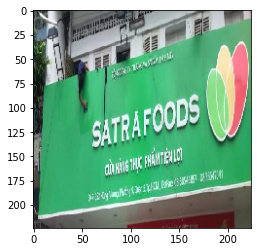

In [8]:
filename = 'images/shopsign.jpg'
# load an image in PIL format
original = load_img(filename,target_size=(224,224))
print('PIL image size', original.size)
plt.imshow(original)
plt.show()

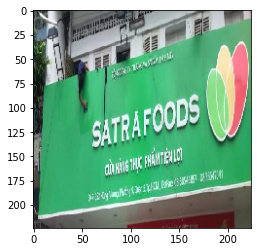

numpy array size (224, 224, 3)


In [9]:
# convert the PIL image to a numpy array
# In PIL - image is in (width, height, channel)
# In Numpy - image is in (height, width, channel)
numpy_image = img_to_array(original)
plt.imshow(np.uint8(numpy_image))
plt.show()
print('numpy array size', numpy_image.shape)

image batch size (1, 224, 224, 3)


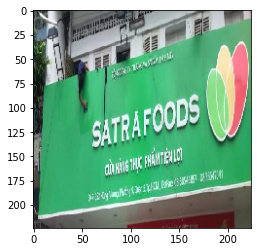

In [10]:
# Convert the image/images into batch format
# expand_dims will add an extra dimension to the data at a particular axis
# We want the input matrix to the network to be of the form (batchsize,height,width,channels)
# Thus we add the extra dimension to the axis 0.
image_batch = np.expand_dims(numpy_image, axis = 0)
print('image batch size', image_batch.shape)
plt.imshow(np.uint8(image_batch[0]))

## Predicting the Object Class

In [11]:
# Prepare the image for the VGG model
# input: (224,224,3)
processed_image = vgg16.preprocess_input(image_batch.copy())

# get the predicted probabilities for each class
predictions = vgg_model.predict(processed_image)
# print predictions

In [12]:
# convert the probabilites to class labels
# We will get top 5 predictions which is the default
label = decode_predictions(predictions)
print(label)

49152/35363 [=========================================] - 0s 0us/step
[[('n03796401', 'moving_van', 0.24757247), ('n06794110', 'street_sign', 0.09373998), ('n02971356', 'carton', 0.08411504), ('n03417042', 'garbage_truck', 0.061084855), ('n02747177', 'ashcan', 0.04012072)]]


PIL image size (224, 224)


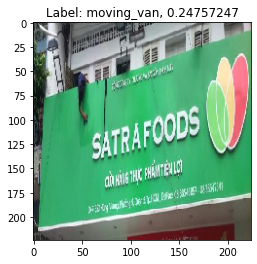

In [13]:
original = load_img(filename, target_size=(224,224))
print('PIL image size', original.size)
plt.imshow(original)
plt.title('Label: ' + label[0][0][1] + ', '+str(label[0][0][2]))
plt.show()

## Comparison of Results from various Models

In [14]:
# prepare the image for the Intercept_V3
# input: (299,299,3)
original2 = load_img(filename,target_size = (299,299))
numpy_image2 = img_to_array(original2)
image_batch2 = np.expand_dims(numpy_image2, axis = 0)
processed_image_m2 = inception_v3.preprocess_input(image_batch2.copy())

In [15]:
# get the predicted probabilities for each class
predictions_2 = inception_model.predict(processed_image_m2)
# print predictions

In [16]:
label_2 = decode_predictions(predictions_2)
print(label_2)

[[('n03796401', 'moving_van', 0.6389142), ('n03417042', 'garbage_truck', 0.12036666), ('n03095699', 'container_ship', 0.023846967), ('n03673027', 'liner', 0.014676294), ('n03393912', 'freight_car', 0.007444013)]]


In [17]:
# prepare the image for the resnet50 model
# input: (224,224,3)
processed_image_m3 = resnet50.preprocess_input(image_batch.copy())

In [18]:
# get the predicted probabilities for each class
predictions_3 = resnet_model.predict(processed_image_m3)

In [19]:
label_3 = decode_predictions(predictions_3)
print(label_3)

[[('n04149813', 'scoreboard', 0.22558987), ('n03095699', 'container_ship', 0.22101104), ('n03796401', 'moving_van', 0.13267197), ('n02871525', 'bookshop', 0.06415175), ('n03661043', 'library', 0.05889164)]]


In [20]:
# prepare the image for the mobilenet model
# input: (224,224,3)
processed_image_m4 = mobilenet.preprocess_input(image_batch.copy())

In [21]:
# get the predicted probabilities for each class
predictions_4 = mobilenet_model.predict(processed_image_m4)

In [22]:
label_4 = decode_predictions(predictions_4)
print(label_4)

[[('n03425413', 'gas_pump', 0.32209882), ('n03095699', 'container_ship', 0.14702721), ('n02977058', 'cash_machine', 0.10565279), ('n03344393', 'fireboat', 0.060754664), ('n03673027', 'liner', 0.059331212)]]


In [23]:
# prepare the image for the Densenet model
# input: (128,128,3)
processed_image_m5 = densenet.preprocess_input(image_batch.copy())

NameError: ignored

In [ ]:
# get the predicted probabilities for each class
predictions_5 = densenet_model.predict(processed_image_m5)